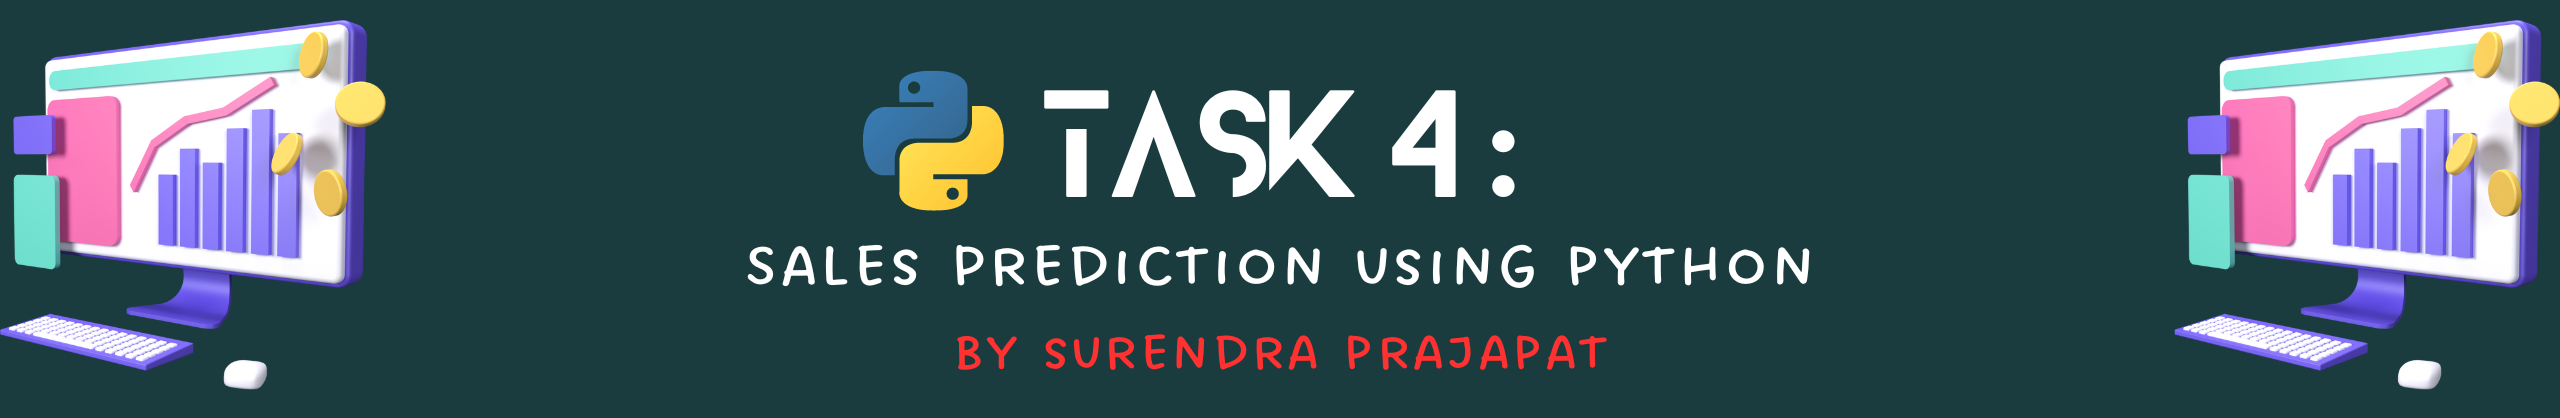

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv("/content/Advertising.csv")

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [ ]:
data = data.drop(columns="Unnamed: 0", axis=1)

In [ ]:
data.shape

(200, 4)

In [ ]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [ ]:
# find duplicate values
data.duplicated().sum()

0

In [ ]:
# statistical measure of data
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

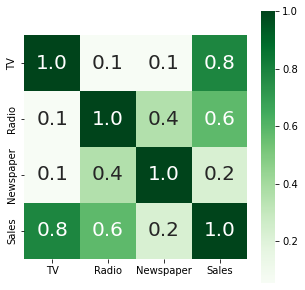

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':20}, cmap="Greens")

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

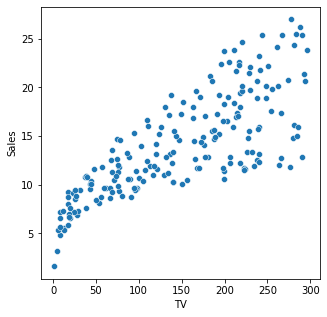

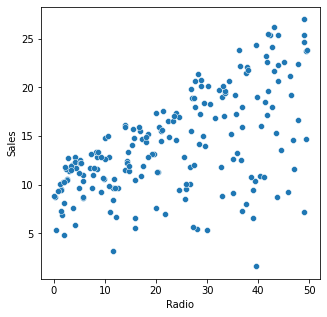

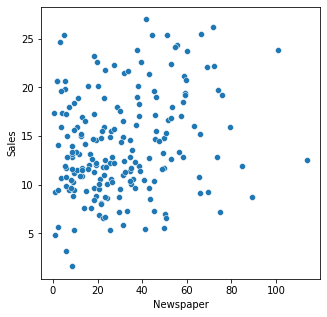

In [ ]:
# Sales vs TV 
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x="TV", y="Sales")
# Sales vs radio
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x="Radio", y="Sales")
# Sales vs newspaper
plt.figure(figsize=(5,5))
sns.scatterplot(data=data, x="Newspaper", y="Sales")

In [ ]:
# Split into target and feature
X = data.drop(columns="Sales", axis=1)
Y = data.Sales

In [ ]:
print(X)
print(Y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


Train & Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160,) (40,)


Model Evaluation

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
test_data_prediction = model.predict(x_test)
test_data_prediction

array([14.0533655 ,  9.3596964 ,  6.84168105, 15.57542062, 18.24566528,
       15.69705683,  7.30213681, 20.55741282, 12.91982687, 17.56977582,
       10.56954425, 19.44183679,  9.02152837, 10.39883137, 14.23578821,
       12.14385282,  8.89722911, 17.65602288, 16.59817803, 18.63325138,
       16.91499972, 16.20074839, 11.56907383, 11.79479752, 15.14324825,
       12.31833158, 15.39070301,  7.93709454, 16.78291467, 14.14997697,
       16.66592168, 16.81179836, 13.06481745, 12.90749021,  8.53383456,
       10.87895886, 21.98983006, 20.14333152, 16.31534821, 19.97848869])

In [ ]:
print('MAE for test data:',metrics.mean_absolute_error(test_data_prediction,y_test))
print('R-Squared for test data',metrics.r2_score(test_data_prediction,y_test))

MAE for test data: 1.6462745449078695
R-Squared for test data 0.709073476229551


In [ ]:
training_data_prediction = model.predict(x_train)
training_data_prediction

array([21.29995014, 17.20629021, 21.19085727, 14.93544794, 19.83406828,
       18.71196999, 17.40255999,  9.98842359,  9.53536321, 12.2876625 ,
       12.63978635, 14.56291507, 17.39742969, 17.16037478,  8.27269304,
       16.77434692,  8.81798422,  3.8301498 ,  7.54396092, 24.83273801,
       19.63736323, 19.47643108, 10.6163053 , 21.76426599, 18.38297158,
       10.28845723, 18.90246663,  6.28244393,  3.86349482,  9.1554719 ,
       10.95900544, 10.51659209, 15.72903137,  9.98905125, 12.18030755,
        6.84893877,  4.72661329,  9.7367636 , 14.50160555, 19.02256142,
       23.26594314, 23.30401795, 14.68576091, 12.71052842, 17.19847606,
       20.82151838, 17.42371728, 10.48644112, 24.33933074, 15.76864728,
       18.44407626, 10.21183774, 15.27231757, 19.42401704, 13.76397481,
       22.02820093, 15.6469129 , 23.50002078, 18.18555568, 14.46430201,
       15.02592567,  6.89504798, 19.42303578,  8.5285362 , 21.59570413,
       10.46650973, 15.28909988, 21.31076299, 13.13731039, 16.51

In [ ]:
print('MAE for test data:',metrics.mean_absolute_error(training_data_prediction,y_train))
print('R-Squared for test data',metrics.r2_score(training_data_prediction,y_train))

MAE for test data: 1.1646205233859799
R-Squared for test data 0.907307724196787


Task 4 Completed